# Network Analysis  

## Outline
- **Median migration** 
- **Centralities**
- **Clustering**
- **Dynamics** 

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import random
import pickle

## Median Migration

In [77]:
df = pd.read_pickle('in_migv2_loops')
nodes = pd.read_pickle('raw_final_node_features_no_geo.pkl')
# migration_col = 'migration' + str(0)
in_df = pd.DataFrame(columns=['ifips', 'jfips'])

for year in df.keys():
    migration_col = 'migration' + year

    # Non-migrants processing
    self_loops = nodes[year][['Non_migrants', 'FIPS', 'FIPS']]
    self_loops.columns = [migration_col, 'ifips', 'jfips']
    self_loops.fillna(0, inplace=True)
    # print(self_loops[self_loops[migration_col] == 0].shape)
    # print(self_loops[self_loops['ifips'] == '06037'])
    # print(self_loops.tail())

    # Migrants processing
    df[year].columns = [migration_col, 'ifips', 'jfips']
    edges = pd.DataFrame(df[year], columns= [migration_col, 'ifips', 'jfips'])
    temp_df = pd.concat([edges, self_loops], ignore_index=True)
    in_df = pd.merge(in_df, temp_df,  how='outer', left_on=['ifips','jfips'], right_on = ['ifips','jfips'])
    # in_df.fillna(0, inplace=True)
    print(in_df[in_df[migration_col] == 0].shape)
    # print((df[year][df[year]['ifips'] == df[year]['jfips']]).sum())
    # print(in_df)

in_df['median_mig'] = in_df[['migration1996', 'migration1990', 'migration1998', 'migration1993',
       'migration1995', 'migration1999', 'migration1994', 'migration1997',
       'migration1992', 'migration1991', 'migration2008', 'migration2005',
       'migration2003', 'migration2009', 'migration2001', 'migration2006',
       'migration2000', 'migration2004', 'migration2002', 'migration2007',
       'migration2010', 'migration2011']].median(axis=1)

in_df['zeros'] = in_df[['migration1996', 'migration1990', 'migration1998', 'migration1993',
       'migration1995', 'migration1999', 'migration1994', 'migration1997',
       'migration1992', 'migration1991', 'migration2008', 'migration2005',
       'migration2003', 'migration2009', 'migration2001', 'migration2006',
       'migration2000', 'migration2004', 'migration2002', 'migration2007',
       'migration2010', 'migration2011']].eq(0).sum(axis=1)


median_df = in_df[['ifips', 'jfips', 'median_mig']].drop_duplicates()

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

(14, 3)
(8, 4)
(12, 5)
(11, 6)
(19, 7)
(16, 8)
(16, 9)
(16, 10)
(24, 11)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

(10, 12)
(91, 13)
(27, 14)
(28, 15)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

(88, 16)
(27, 17)
(25, 18)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

(27, 19)
(24, 20)
(26, 21)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

(56, 22)
(86, 23)
(85, 24)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_9410/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)


In [78]:
in_df[in_df['ifips'] == in_df['jfips']]['zeros']

78257     0
78258     0
78259     0
78260     0
78261     0
         ..
117055    0
117056    0
117058    0
180403    0
180902    0
Name: zeros, Length: 25385, dtype: int64

In [79]:
median_df[median_df['ifips'] == median_df['jfips']].sort_values(by='median_mig', ascending=False)

,ifips,jfips,median_mig
79731,06037,06037,3005795.5
79934,17031,17031,1858941.5
105258,17031,17031,1837052.0
79949,48201,48201,1079317.5
180902,12086,12086,1001139.0
...,...,...,...
109322,31007,31007,0.0
100802,48261,48261,0.0
100195,02231,02231,0.0
109321,31005,31005,-0.5


#### STATE level migrations  

In [80]:
# Rename the columns to match your actual column names if necessary
source_county_col = 'ifips'
target_county_col = 'jfips'
migration_col = 'median_mig'

# Define a function to extract the state FIPS code from a county FIPS code
def county_to_state_fips(county_fips):
    return int(str(county_fips).zfill(5)[:2])

# Create a new DataFrame with the state FIPS codes for each county FIPS code
median_df['source state'] = median_df[source_county_col].apply(county_to_state_fips)
median_df['target state'] = median_df[target_county_col].apply(county_to_state_fips)

# Group by source and target state FIPS codes and sum the migration values
state_migration = median_df.groupby(['source state', 'target state'])[migration_col].sum().reset_index()

# Rename the columns in the new DataFrame
state_migration.columns = ['source state', 'target state', 'migration']

# Mapping to names
state_fips_to_code = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA',
    15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD',
    25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ',
    35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC',
    46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}
# Convert the state FIPS codes to state codes
state_migration['source state'] = state_migration['source state'].map(state_fips_to_code)
state_migration['target state'] = state_migration['target state'].map(state_fips_to_code)

# remove all the ones that have 0 migration
state_migration = state_migration[state_migration['migration'] != 0]

In [81]:
# Print the unique values of migration by ascending order
state_migration['migration'].unique()

array([1.490869e+06, 1.300000e+02, 2.910000e+02, ..., 2.765000e+02,
       6.330000e+02, 3.311600e+05])

In [82]:
state_migration[state_migration['source state'] == state_migration['target state']].sort_values(by='migration', ascending=False)

,source state,target state,migration
1567,NY,NY,12750226.5
2081,TX,TX,12348932.5
438,FL,FL,11383241.5
188,CA,CA,11335650.0
1853,PA,PA,8915974.0
638,IL,IL,8521585.0
1707,OH,OH,8309841.0
1080,MI,MI,6681526.0
1465,NJ,NJ,5949068.0
1618,NC,NC,5165740.0


In [13]:
# Create an empty directed graph
G_state = nx.DiGraph()

# Iterate through the rows in the DataFrame and add edges to the graph
for index, row in state_migration.iterrows():
    source = row['source state']
    target = row['target state']
    weight = row['migration']
    G_state.add_edge(source, target, weight=weight)

# Print the graph's nodes and edges
print("Nodes:", G_state.nodes())
print("Edges:", G_state.edges(data=True))

Nodes: ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'DC', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NM', 'NY', 'NC', 'OH', 'OK', 'PA', 'SC', 'TN', 'TX', 'VA', 'WA', 'ID', 'MT', 'NJ', 'ND', 'OR', 'SD', 'UT', 'WY', 'CT', 'DE', 'IA', 'ME', 'NH', 'RI', 'VT', 'WI', 'WV']
Edges: [('AL', 'AL', {'weight': 1485899.0}), ('AL', 'AK', {'weight': 33.0}), ('AL', 'AZ', {'weight': 145.5}), ('AL', 'AR', {'weight': 19.0}), ('AL', 'CA', {'weight': 424.5}), ('AL', 'CO', {'weight': 153.0}), ('AL', 'DC', {'weight': 45.5}), ('AL', 'FL', {'weight': 2734.0}), ('AL', 'GA', {'weight': 3925.0}), ('AL', 'HI', {'weight': 116.0}), ('AL', 'IL', {'weight': 202.5}), ('AL', 'IN', {'weight': 29.0}), ('AL', 'KS', {'weight': 5.0}), ('AL', 'KY', {'weight': 88.5}), ('AL', 'LA', {'weight': 360.5}), ('AL', 'MD', {'weight': 78.5}), ('AL', 'MA', {'weight': 36.0}), ('AL', 'MI', {'weight': 123.5}), ('AL', 'MN', {'weight': 11.0}), ('AL', 'MS', {'weight': 896.5}), ('AL', 'MO', {'weight'

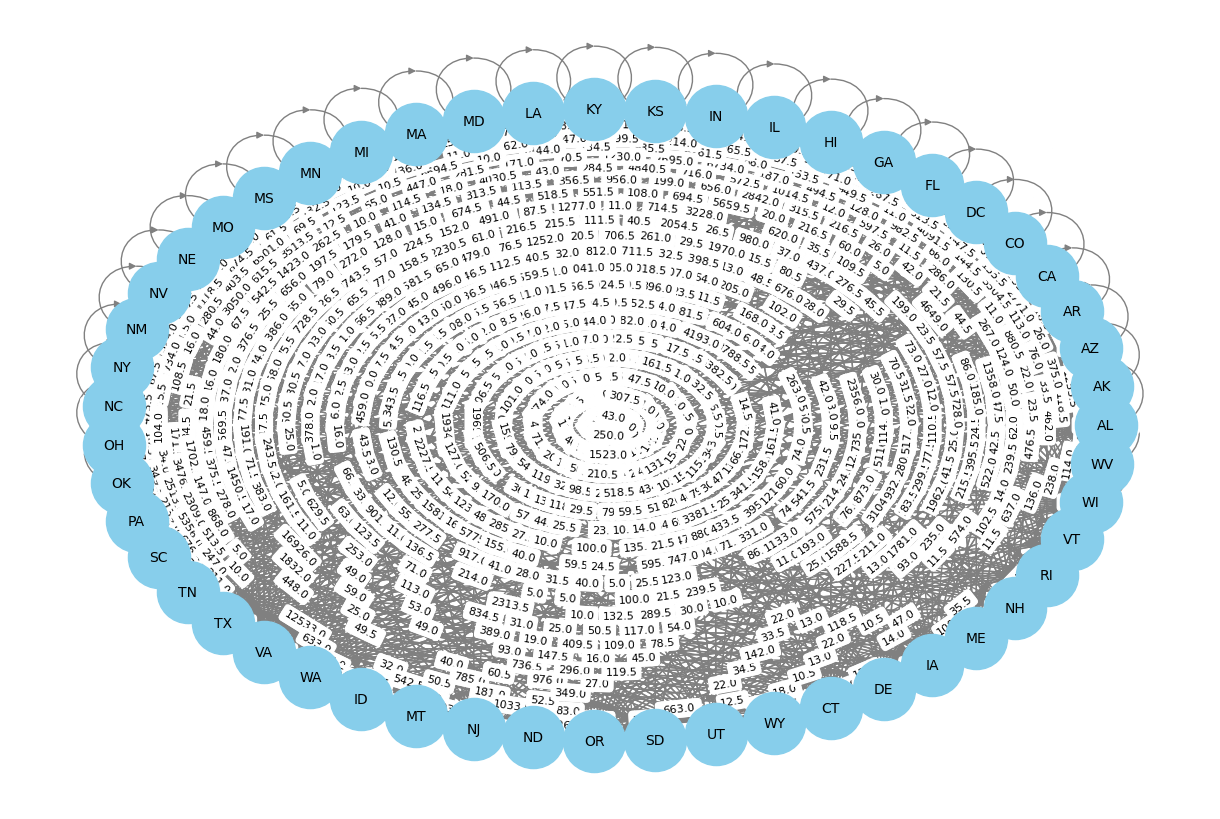

In [14]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Choose a layout algorithm
pos = nx.circular_layout(G_state)

# Draw the graph
nx.draw(G_state, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G_state, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G_state.edges(data=True)}, font_size=8)

# Display the plot
plt.show()
